# Dessin de la naissance à la mort d'une génération

L'objectif de cet exemple est de représenter graphiquement les générations 1975 à 1990 de leur naissance jusqu'à leur mort, en moyenne.

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
import numpy as np

## Espérance de vie à 60 ans par génération

In [2]:
simulateur = SimulateurRetraites('../retraites/fileProjection.json')

In [3]:
s = 1 # L'espérance de vie est indépendante du scénario économique

In [4]:
esperance_vie = [simulateur.EV[s][a] for a in simulateur.annees_EV]

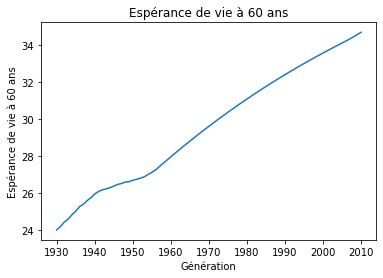

In [5]:
pl.plot(simulateur.annees_EV, esperance_vie)
pl.xlabel("Génération")
pl.ylabel("Espérance de vie à 60 ans");
pl.title("Espérance de vie à 60 ans");

## Age moyen de départ à la retraite

In [6]:
analyse = simulateur.pilotageCOR()

In [7]:
age_depart = [analyse.A[s][a] for a in analyse.annees]

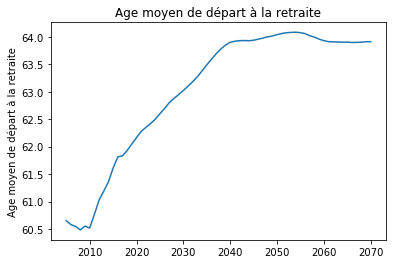

In [8]:
pl.plot(analyse.annees, age_depart)
pl.ylabel("Age moyen de départ à la retraite")
pl.title("Age moyen de départ à la retraite");

## Trajectoire de vie de la naissance à la mort

In [9]:
def plotTrajectoireVieMort():
    generation_precedente = 0.
    pl.figure(figsize=(12,8))
    pl.xlabel("Génération")
    premier = True
    for a in simulateur.annees:
        annee_retraite = a                       # Année de départ à la retraite
        age_retraite = analyse.A[s][a]           # Age de départ à la retraite
        generation = int(a + 0.5 - age_retraite) # Génération
        if (generation == generation_precedente):
            # Evite les duplications de génération
            continue
        ev_60 = simulateur.EV[s][generation]     # Espérance de vie à 60 ans
        age_mort = 60.0 + ev_60                  # Age au moment de la mort
        annee_mort = generation + age_mort       # Année de la mort
        if premier:
            pl.plot([generation, generation],[generation, annee_mort], "k-", label = "Vie")
            pl.plot([generation],[generation], "bo", label = "Naissance")
            pl.plot([generation],[annee_retraite], "go", label = "Retraite")
            pl.plot([generation],[annee_mort], "ro", label = "Mort")
            premier = False
        else:
            pl.plot([generation, generation],[generation, annee_mort], "k-")
            pl.plot([generation],[generation], "bo")
            pl.plot([generation],[annee_retraite], "go")
            pl.plot([generation],[annee_mort], "ro")
        generation_precedente = generation
    pl.legend();
    pl.title("Naissance et mort par génération (espérance de vie à 60 ans)")
    pl.grid();
    return

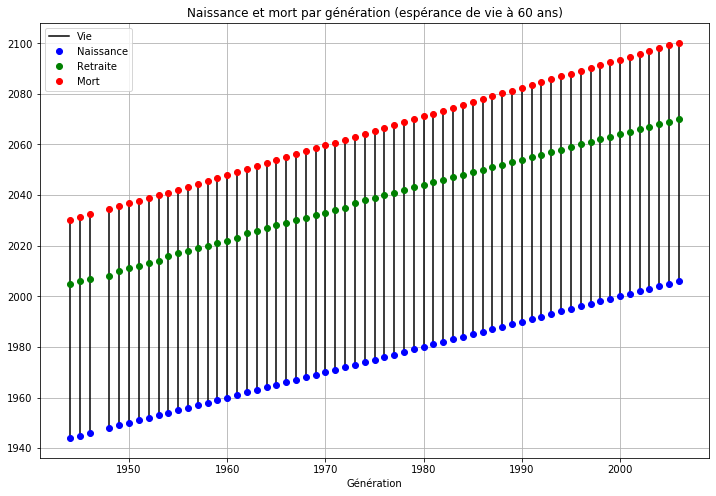

In [10]:
plotTrajectoireVieMort()

Le calcul précédent est toutefois marqué par une approximation. En effet, nous avons utilisé l'espérance de vie à 60 ans et non pas l'espérance de vie à la naissance. C'est pourquoi les durées de vie indiquées dans le graphique précédent sont supérieures aux durée de vie par génération réelle. 

Pour une année donnée, plusieurs générations se côtoient au sein de la population des retraités. Pour le voir, on peut tracer une ligne horizontale pour une année donnée et observer toutes les générations retraitées en vie en moyenne à cette date. Par exemple, en 2060, les générations avant 1970 sont mortes en moyenne tandis que les générations après 1996 ne sont pas encore à la retraite. Par conséquent, les générations en retraite en 2060 en moyenne sont les générations 1970 à 1996. 

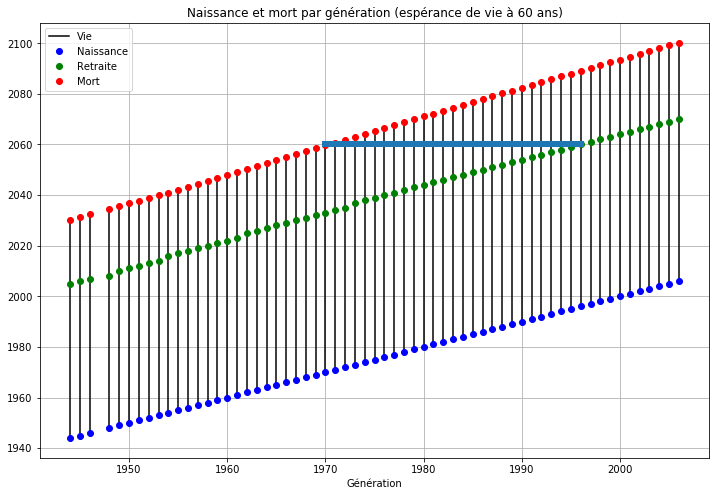

In [11]:
plotTrajectoireVieMort()
pl.plot([1970.0,1996.0], [2060.0,2060.0], "-", linewidth=6);